<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜: 2022.05.04
* 이름: 윤태우

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 지수 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp # 사이파이 -> 데이터 사이언스에 필요한 함수들 포함한 라이브러리
from scipy.stats import *  # * = 모든것을 임포트 하겠다는 뜻 
import warnings
warnings.filterwarnings('ignore')

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}   \mu = 뮤, 모수(파라미터) \sigma = 시그마, 모수(파라미터)
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [2]:
mu, std = 0, 1 # 표준 정규분포

norm = sp.stats.norm(mu, std)    # 확률 함수


* 확률 분포


In [3]:
X = np.linspace(-5,5,10) # -5부터 5까지 100개
P_X = norm.pdf(X) # 밀도함수
print(P_X)

[1.48671951e-06 2.07440309e-04 8.42153448e-03 9.94771388e-02
 3.41892294e-01 3.41892294e-01 9.94771388e-02 8.42153448e-03
 2.07440309e-04 1.48671951e-06]


* 누적 확률 분포


In [4]:
F_X = norm.cdf(X)
print(F_X)

[2.86651572e-07 5.03521029e-05 2.73660179e-03 4.77903523e-02
 2.89257361e-01 7.10742639e-01 9.52209648e-01 9.97263398e-01
 9.99949648e-01 9.99999713e-01]


* 표본 추출



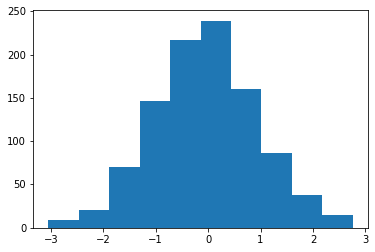

In [5]:
rvs = norm.rvs(1000, random_state = 0)
_ = plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

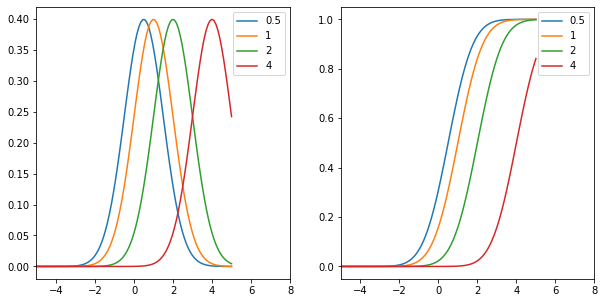

In [6]:
mus = [0.5, 1, 2, 4]
std = 1
X = np.linspace(-5,5,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes = axes.flatten()

for mu in mus :
  norm =sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도 함수
  F_X = norm.cdf(X) # 누적 확률 함수


  axes[0].plot(X, P_X)  # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X)  # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # x 범위조절
  axes[1].set_xlim(-5,8) # x 범위조절
axes[0].legend(mus) # 라벨
axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

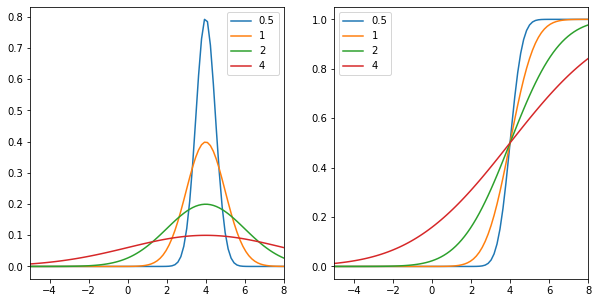

In [7]:
mus = 0
stds = [0.5, 1, 2, 4]
X = np.linspace(-5,10,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes = axes.flatten()

for std in stds :
  norm = sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도 함수
  F_X = norm.cdf(X) # 누적 확률 함수


  axes[0].plot(X, P_X)  # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X)  # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # x 범위조절
  axes[1].set_xlim(-5,8) # x 범위조절
axes[0].legend(stds) # 라벨
axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

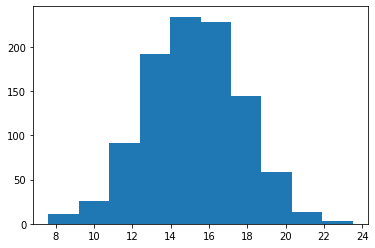

In [8]:
mu, std = 15.2, 2.5
norm = sp.stats.norm(mu, std)
rvs = norm.rvs(1000)

_ = plt.hist(rvs)

### **| 지수 분포**

\begin{cases}\lambda e^{-\lambda x}&x\geq 0\\0&x<0\end{cases}
**λ는 빈도를 나타내는 모수**

---



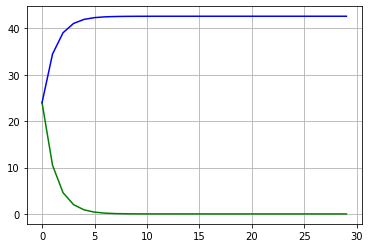

In [9]:
# lamnda 값 설정 (5일에 4번 커피를 한번 먹는 민수)
# 하루동안 커피를 먹을 확률 : 4/5
# 한달 동안이면 4/5*30
lam = 0.8*30
X = np.linspace(0, 1, 30)

def f(x) :
  if x >= 0 :
    return lam * np.exp(-lam*x)
  else :
    return 0

P = list(map(f,X))
F_P = np.cumsum(P)

plt.plot(P, color = 'green')
plt.plot(F_P, color = 'blue')
plt.grid()
plt.show()


### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [10]:
df = 2  # k개의 서로 독립적인 표준정규 확률변수를 각각 제곱한 다음 합해서 얻어지는 분포이다. 이 때 k를 자유도라고 하며, 카이제곱 분포의 매개변수가 된다.
X = np.linspace(0,20,201)
Y = sp.stats.chi2(df).pdf(X)

* 확률 분포


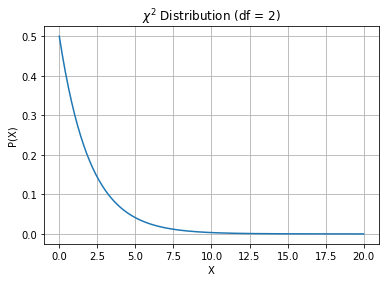

In [11]:
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title(f'$\chi^2$ Distribution (df = {df})')
plt.grid()
plt.show()

* 누적 확률 분포


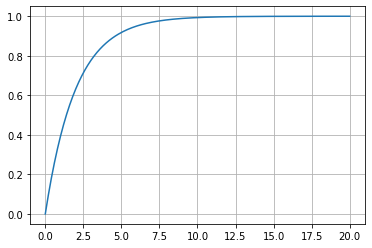

In [12]:
Y = sp.stats.chi2(df).cdf(X)
plt.plot(X,Y)
plt.grid()
plt.show()

* 표본 추출


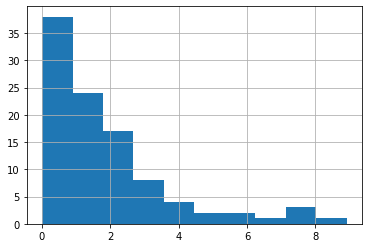

In [13]:
Y = sp.stats.chi2(df)
rvs = Y.rvs(100, random_state=0)
plt.hist(rvs)
plt.grid()
plt.show()

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

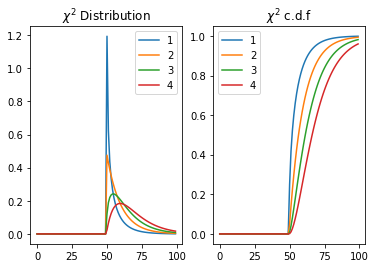

In [14]:
dfs = [1,2,3,4]
X = np.linspace(-10,10,100)
for df in dfs:
  Y = sp.stats.chi2(df)
  plt.subplot(1,2,1)
  plt.plot(Y.pdf(X))
  plt.legend(dfs)
  plt.title(f'$\chi^2$ Distribution')
  plt.subplot(1,2,2)
  plt.plot(Y.cdf(X))
  plt.legend(dfs)
  plt.title(f'$\chi^2$ c.d.f')
  plt.grid()
plt.show()

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

Gam(x;k,Θ)

k = 형상모수, (k > 0)
Θ = 척도모수, (Θ > 0)

In [15]:
# k=1,Θ =1/lambda }는 지수 분포가 된다.
a1 = [1,2,4,8]
b = 1
X = np.linspace(-10,20,100)

for a in a1 :
  Y = sp.stats.gamma(a,b)

* 확률 분포

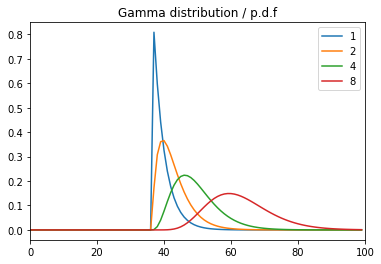

In [16]:
for a in a1 :
  Y = sp.stats.gamma(a,b)
  plt.plot(Y.pdf(X))
  plt.legend(a1)
  plt.title('Gamma distribution / p.d.f')
  plt.xlim(0,100)
  plt.grid()

* 누적 확률 분포


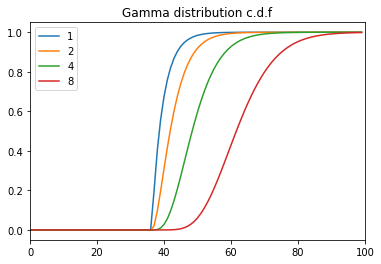

In [17]:
for a in a1 :
  Y = sp.stats.gamma(a,b)
  plt.plot(Y.cdf(X))
  plt.legend(a1)
  plt.title('Gamma distribution c.d.f')
  plt.xlim(0,100)
  plt.grid()

* 표본 추출

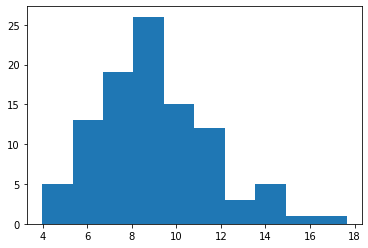

In [18]:
rvs = Y.rvs(100)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

In [19]:
# 동전던지기 -> 앞,뒤 (0.5 확률)
mu = 0.5
bern = sp.stats.bernoulli(mu)

* 확률 분포


In [20]:
# 확률 반환
# 0과 1사이에서만 값이 확률값이 존재. 나머지는 0
bern.pmf([0,1,2])

array([0.5, 0.5, 0. ])

* 누적 확률 분포


In [21]:
bern.cdf([0,1])

array([0.5, 1. ])

* 표본 추출

In [22]:
bern.rvs(20)
# rvs = random variable

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



In [23]:
# 동전던지기 -> 앞,뒤 (0.5 확률)
mu = 0.5
bern = sp.stats.bernoulli(mu)

# 확률 반환
# 0과 1사이에서만 값이 확률값이 존재. 나머지는 0
print(f'pmf : {bern.pmf([0,1])}, cdf : {bern.cdf([0,1])}, rvs : {bern.rvs(20)}')

pmf : [0.5 0.5], cdf : [0.5 1. ], rvs : [1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0]


#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


No handles with labels found to put in legend.


[0.83333333 0.16666667]


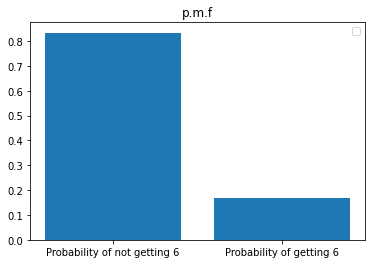

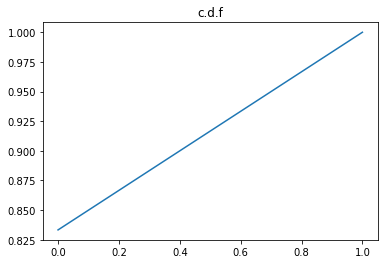

In [24]:
# 6이 나올 확률
mu = 1/6
x = [0,1]
label = ['Probability of not getting 6', 'Probability of getting 6']
bern = sp.stats.bernoulli(mu)

# 확률 함수
P = bern.pmf(x)
print(P)
plt.bar(x,P)
plt.xticks(x, labels = label)
plt.legend()
plt.title('p.m.f')
plt.show()

# 누적 확률 함수
F = bern.cdf(x)
plt.plot(x, F)
plt.title('c.d.f')
plt.show()

#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


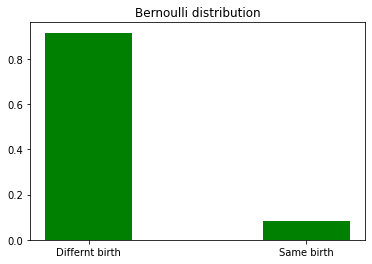

Different birth : 0.9166666666666666, Same birth : 0.08333333333333333


In [25]:
# 사람 1 생일 1~ 12월, 사람 2 생일 1 ~ 12월 -> 생일이 같을 확률 12/12*12
mu = 1/12
bern = sp.stats.bernoulli(mu)
P = bern.pmf([0,1])
x = ['Differnt birth','Same birth']
plt.bar(x, P, width = 0.4, color = 'green')
plt.title('Bernoulli distribution')
plt.show()
print(f'Different birth : {P[0]}, Same birth : {P[1]}')

#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

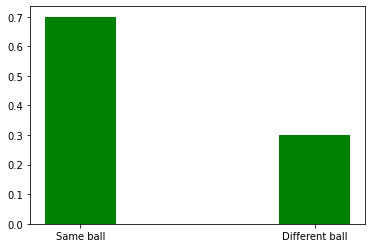

Same ball : 0.7000000000000001, Differnt ball : 0.3


In [26]:
# 총 5개, 빨강 3개, 하양 2개
# 빨강 뽑을 확률 3/5, 하양 2/5 빨간공, 하얀공 동시에 뽑을 확률 : 3/5 * 2/4

mu = 3/5 * 2/4
bern = sp.stats.bernoulli(mu)
P = bern.pmf([0,1])
x = ['Same ball', 'Different ball']
plt.bar(x, P, color = 'g', width = 0.3)
plt.show()
print(f'Same ball : {P[0]}, Differnt ball : {P[1]}')

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

In [27]:
# 베르누이 시행을 N번 한 결과의 확률
# 동전 던지기를 10번 시행
N, mu = 10, 0.5 # mu를 앞면이 나올 확률로 설정.
binom = sp.stats.binom(N,mu)

* 확률 분포


In [28]:
# x는 앞면이 나오는 횟수 (0, 1, 2, 3.....10)
# p는 각 횟수에 대한 확룰
binom.pmf(np.arange(11))

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

* 누적 확률  분포

In [29]:
binom.cdf(np.arange(11))

array([9.76562500e-04, 1.07421875e-02, 5.46875000e-02, 1.71875000e-01,
       3.76953125e-01, 6.23046875e-01, 8.28125000e-01, 9.45312500e-01,
       9.89257812e-01, 9.99023438e-01, 1.00000000e+00])

* 확률 변수 표본 추출


In [30]:
binom.rvs(100)

array([5, 6, 6, 3, 5, 5, 4, 8, 6, 7, 6, 5, 6, 4, 7, 4, 6, 4, 3, 5, 5, 5,
       7, 5, 3, 5, 5, 5, 5, 4, 7, 5, 5, 4, 5, 4, 3, 6, 4, 5, 6, 1, 6, 6,
       6, 4, 5, 6, 5, 5, 4, 4, 6, 7, 4, 6, 4, 5, 5, 2, 5, 4, 7, 7, 6, 7,
       8, 5, 7, 4, 8, 2, 8, 4, 6, 3, 4, 6, 4, 4, 6, 5, 8, 7, 5, 7, 5, 6,
       4, 5, 5, 7, 4, 7, 5, 4, 4, 3, 7, 4])

#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



In [31]:
N = 1
mu = 0.5
bino = sp.stats.binom(N,mu)
P = bino.pmf([1])
P

array([0.5])

* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


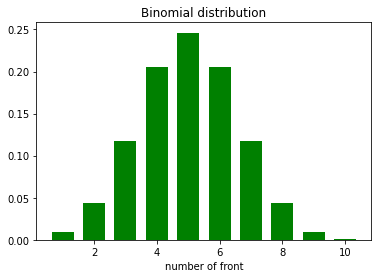

[0.00976563 0.04394531 0.1171875  0.20507813 0.24609375 0.20507813
 0.1171875  0.04394531 0.00976563 0.00097656]


In [32]:
N = 10
mu = 0.5
bino = sp.stats.binom(N,mu)
P = bino.pmf(np.arange(1,11))
plt.bar(np.arange(1,11),P,color = 'g', width = 0.7)
plt.title('Binomial distribution')
plt.xlabel('number of front')
plt.show()
print(P)

#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

In [33]:
N = 1
mu = 0.5
bino = sp.stats.binom(N,mu)
P = bino.pmf([1])
P

array([0.5])

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

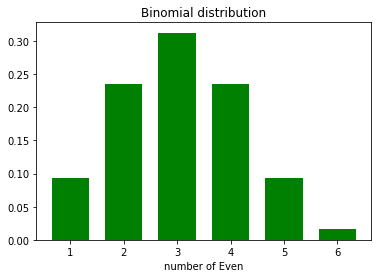

[0.09375  0.234375 0.3125   0.234375 0.09375  0.015625]


In [34]:
N = 6
mu = 0.5
x = np.arange(1,7)
bino = sp.stats.binom(N,mu)
P = bino.pmf(x)
plt.bar(x, P, color = 'g', width = 0.7)
plt.title('Binomial distribution')
plt.xlabel('number of Even')
plt.show()
print(P)

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

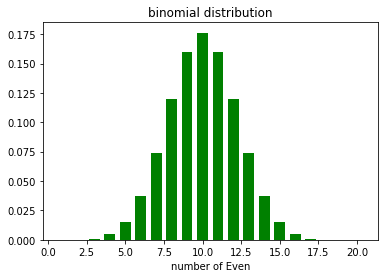

[1.90734863e-05 1.81198120e-04 1.08718872e-03 4.62055206e-03
 1.47857666e-02 3.69644165e-02 7.39288330e-02 1.20134354e-01
 1.60179138e-01 1.76197052e-01 1.60179138e-01 1.20134354e-01
 7.39288330e-02 3.69644165e-02 1.47857666e-02 4.62055206e-03
 1.08718872e-03 1.81198120e-04 1.90734863e-05 9.53674316e-07]


In [35]:
N = 20
mu = 0.5
x = np.arange(1,21)
bino = sp.stats.binom(N,mu)
P = bino.pmf(x)
plt.bar(x, P, color = 'g', width = 0.7)
plt.title('binomial distribution')
plt.xlabel('number of Even')
plt.show()
print(P)

* 주사위를 1번 던져서 6이 나온 횟수의 분포

In [36]:
N = 1
mu = 1/6
x = np.arange(1)
bino = sp.stats.binom(N,mu)
P = bino.pmf(x)
print(P)

[0.83333333]


* 주사위를 6번 던져서 6이 나온 횟수의 분포

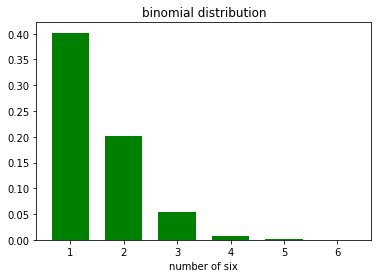

[4.01877572e-01 2.00938786e-01 5.35836763e-02 8.03755144e-03
 6.43004115e-04 2.14334705e-05]


In [37]:
N = 6
mu = 1/6
x = np.arange(1,7)
bino = sp.stats.binom(N,mu)
P = bino.pmf(x)
plt.bar(x, P, color = 'g', width = 0.7)
plt.title('binomial distribution')
plt.xlabel('number of six')
plt.show()
print(P)

* 주사위를 20번 던져서 6이 나온 횟수의 분포

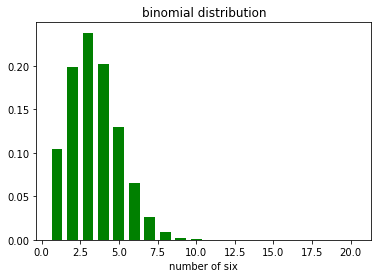

[1.04336213e-01 1.98238805e-01 2.37886566e-01 2.02203581e-01
 1.29410292e-01 6.47051460e-02 2.58820584e-02 8.41166898e-03
 2.24311173e-03 4.93484580e-04 8.97244691e-05 1.34586704e-05
 1.65645174e-06 1.65645174e-07 1.32516139e-08 8.28225869e-10
 3.89753350e-11 1.29917783e-12 2.73511123e-14 2.73511123e-16]


In [38]:
N = 20
mu = 1/6
x = np.arange(1,21)
bino = sp.stats.binom(N,mu)
P = bino.pmf(x)
plt.bar(x, P, color = 'g', width = 0.7)
plt.title('binomial distribution')
plt.xlabel('number of six')
plt.show()
print(P)

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

In [39]:
# x=(1,0,0,⋯,0) : 원-핫 인코딩
# multinomial(N, mu)
# N : N번 시행 -> 1로 고정
# mus : 클래스 별 확률, 벡터 (리스트, 어레이)

mult = sp.stats.multinomial(1,[1/3,1/3,1/3])

* 확률 분포


In [40]:
# 베르누이 시행에서  
# X = [0, 1] -> p(xs) = [0.6, 0.4]
# x값이 0일때, 확률 0.6이다

# 카테고리 시행
# x값이 'A' 일 때, 'B' 일 때, 'C' 일 때
# 원-핫 인코딩 : 각 클래스를 벡터로 표현
# 'A' = [1,0,0], 'B' = [0,1,0], 'C' = [0,0,1]
mult.pmf([0,1,0]) # B가 나올 확률 

one_h = ([1,0,0],
         [0,1,0],
         [0,0,1])

* 표본 추출


In [41]:
mult.rvs(10)

# 카테고리 확률분포는 누적확률 분포 없음.

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

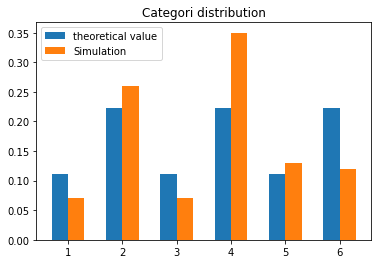

In [42]:
# 홀수 나올 확률 = p, 짝수 = 2*p 주사위는 홀수 3개 짝수 3개 이므로 3p + 2*3*p = 9p, p = 1/9
mu = [1/9, 2/9, 1/9, 2/9, 1/9, 2/9]
multi = sp.stats.multinomial(1,mu)  # N = 1, 
x = np.arange(1,7)
X = pd.get_dummies(x)        # 원-핫 인코딩 값

P = multi.pmf(X.values)
R = multi.rvs(100)           # 실제 확률과 시뮬레이션 확률(랜덤 변수의 확률)의 비교를 위해 만듦.
R1 = sum(R)/len(R)           # R이 원-핫 인코딩값들이 100개 있고, 각 열을 합한 값에 길이를 나누면 6개의 값들이 각각 나올 확률이 나옴.

plt.bar(x-0.15,P, width = 0.3, label = 'theoretical value')
plt.bar(x+0.15,R1, width = 0.3, label = 'Simulation')
plt.legend()
plt.title('Categori distribution')
plt.show()

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

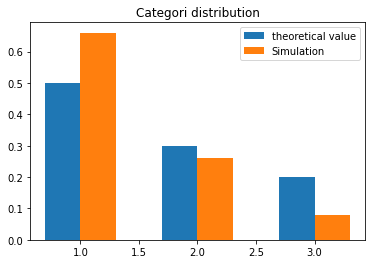

In [43]:
# 총 10개, 빨간색 뽑을 확률 = 5/10, 노란색 = 3/10, 초록색 = 2/10
mu = [5/10, 3/10, 2/10]
multi = sp.stats.multinomial(1,mu)  # N = 1, 
x = np.arange(1,4)
rv = pd.get_dummies(x)
P = multi.pmf(rv.values)
R = multi.rvs(100)           
R1 = sum(R)/len(R)           

plt.bar(x-0.15,P, width = 0.3, label = 'theoretical value')
plt.bar(x+0.15,R1, width = 0.3, label = 'Simulation')
plt.legend()
plt.title('Categori distribution')
plt.show()

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.

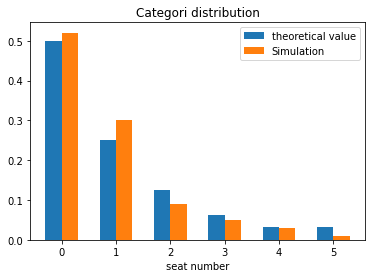

In [47]:
# 자리에 앉을 확률 함수로 정의
def f(x):
  y = 1/(2**(x+1))
  return y

# 각 자리에 앉을 확률 mu에 바인딩
mu = []
for i in range(6) :
  mu.append(f(i))

multi = sp.stats.multinomial(1,mu)  # N = 1, 
x = np.arange(6)
rv = pd.get_dummies(x)
P = multi.pmf(rv.values)
R = multi.rvs(100)           
R1 = sum(R)/len(R)           

plt.bar(x-0.15,P, width = 0.3, label = 'theoretical value')
plt.bar(x+0.15,R1, width = 0.3, label = 'Simulation')
plt.xlabel('seat number')
plt.legend()
plt.title('Categori distribution')
plt.show()